#                             PROJECT-  Spam Email Classifier

In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
#importing the dataset
dataset=pd.read_csv('SMSSpamCollection1', sep='\t',names=["label", "message"])

In [4]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#  Exploratory Data Analysis:
   To check out some of the stats with some plots and the built-in methods in pandas!
    

In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#groupby is used to describe by label, this way we can begin to think about the features that separate ham and spam!
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
#here we have applied len function to check the length of the message
dataset['length'] = dataset['message'].apply(len)
dataset.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#                                    Data Visualization

In [8]:
#for visualization lets import the following:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#with this the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

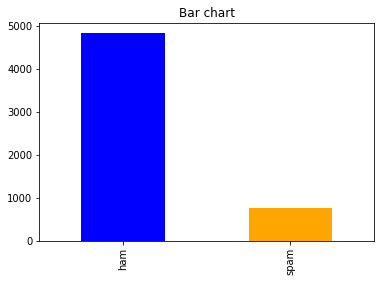

In [10]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

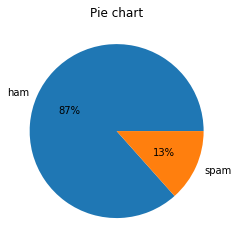

In [11]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()


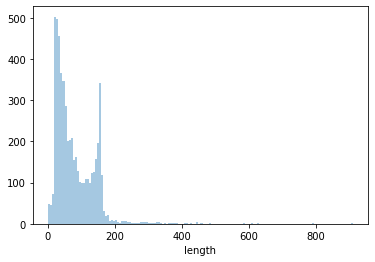

In [12]:

#here we can visualize the length of the message
sns.distplot(dataset['length'],bins=150,kde=False)

Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 
1000ish, this must mean that there is some really long message!

In [13]:
#so we see that the max length of one msg is 910
dataset.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
#we can also see a particular message
dataset[dataset['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7CA78B9C8>,
      dtype=object)

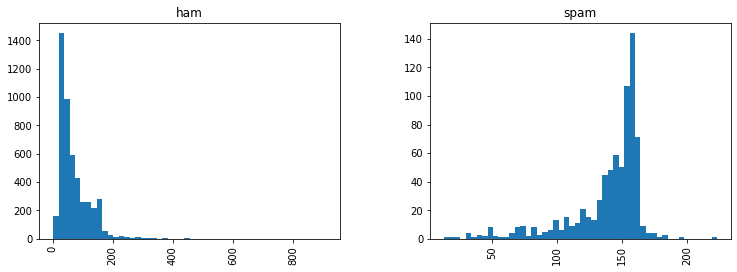

In [15]:
#we have been able to discover a trend that spam messages tend to have more characters
dataset.hist(column='length', by='label', bins=50,figsize=(12,4))


# Text Pre-processing

Our main issue with our data is that it is all in text format (strings).The classification algorithm need some sort of 
numerical feature vector in order to perform the classification task.

In [16]:
#necessary library that need to be imported for NLP
import nltk

In [17]:
#for removing punctuation,digit

import re


In [18]:
#we need to import'stopwords' for removing words which have little or 
#no significance, especially when constructing meaningful features from text
from nltk.corpus import stopwords



In [19]:

from nltk.stem.porter import PorterStemmer

In [20]:
#creating the object 
ps=PorterStemmer()

In [21]:
corpus=[]
for i in range(0,5572):
    msg=re.sub('[^a-zA-Z]',' ',dataset['message'][i])
    msg=msg.lower()
    msg=msg.split()
    #ps=PorterStemmer()
    msg=[ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg=" ".join(msg)
    corpus.append(msg)


In [22]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(corpus).toarray()


In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
print(x.shape)



(5572, 5000)


In [26]:
y=dataset.iloc[:,0:1].values

In [27]:
y

array([['ham'],
       ['ham'],
       ['spam'],
       ...,
       ['ham'],
       ['ham'],
       ['ham']], dtype=object)

In [28]:
#encoding the target variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y.ravel())


In [29]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Training a model


With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of 
classification algorithms. But after several trial and error method I had chosen the SVM classifier algorithm since it gave me 
high accuracy along with good result in terms of confusion matrix.



In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


# Fitting SVM to the Training set

In [31]:

from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train,y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicting the Test set results

In [32]:

y_pred = SVM.predict(x_test)

In [33]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

# Model Evaluation
Now we want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [35]:
cm

array([[1443,    8],
       [  24,  197]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9808612440191388

In [37]:
#some more evalutaion
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1451
           1       0.96      0.89      0.92       221

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



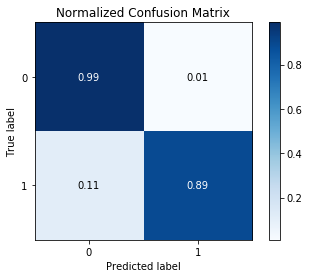

In [38]:
#visualization of the confusion matrix
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)
plt.show()

                                              THANK YOU!